#KDDCUP99 

In [ ]:
# Load Libraries


In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.pylab as pylab
import numpy as np
import pandas as pd

In [2]:
#Load Dataset

In [3]:
columns = ["duration", "protocol_type", "service",
"flag", "src_bytes", "dst_bytes", "land",
"wrong_fragment", "urgent", "hot", "num_failed_logins",
"logged_in", "num_compromised", "root_shell",
"su_attempted", "num_root", "num_file_creations",
"num_shells", "num_access_files", "num_outbound_cmds",
"is_host_login", "is_guest_login", "count", "srv_count",
"serror_rate", "srv_serror_rate", "rerror_rate",
"srv_rerror_rate", "same_srv_rate", "diff_srv_rate",
"srv_diff_host_rate", "dst_host_count",
"dst_host_srv_count", "dst_host_same_srv_rate",
"dst_host_diff_srv_rate", "dst_host_same_src_port_rate",
"dst_host_srv_diff_host_rate", "dst_host_serror_rate",
           "dst_host_srv_serror_rate", "dst_host_rerror_rate",
"dst_host_srv_rerror_rate", "outcome"]

In [4]:
dataset = pd.read_csv('C:\\Users\\edingha\\Documents\\Business Analytics\\BAF03\\dataset\\kddcup.data_10_percent_corrected', names=columns, nrows=1000000)

In [5]:
print(dataset.head())
dataset.shape
dataset.info()
dataset.dtypes

   duration protocol_type service flag  src_bytes  dst_bytes  land  \
0         0           tcp    http   SF        181       5450     0   
1         0           tcp    http   SF        239        486     0   
2         0           tcp    http   SF        235       1337     0   
3         0           tcp    http   SF        219       1337     0   
4         0           tcp    http   SF        217       2032     0   

   wrong_fragment  urgent  hot   ...     dst_host_srv_count  \
0               0       0    0   ...                      9   
1               0       0    0   ...                     19   
2               0       0    0   ...                     29   
3               0       0    0   ...                     39   
4               0       0    0   ...                     49   

   dst_host_same_srv_rate  dst_host_diff_srv_rate  \
0                     1.0                     0.0   
1                     1.0                     0.0   
2                     1.0                

duration                         int64
protocol_type                   object
service                         object
flag                            object
src_bytes                        int64
dst_bytes                        int64
land                             int64
wrong_fragment                   int64
urgent                           int64
hot                              int64
num_failed_logins                int64
logged_in                        int64
num_compromised                  int64
root_shell                       int64
su_attempted                     int64
num_root                         int64
num_file_creations               int64
num_shells                       int64
num_access_files                 int64
num_outbound_cmds                int64
is_host_login                    int64
is_guest_login                   int64
count                            int64
srv_count                        int64
serror_rate                    float64
srv_serror_rate          

In [6]:
#Explore the data

In [7]:
sorted(dataset['outcome'].unique())

['back.',
 'buffer_overflow.',
 'ftp_write.',
 'guess_passwd.',
 'imap.',
 'ipsweep.',
 'land.',
 'loadmodule.',
 'multihop.',
 'neptune.',
 'nmap.',
 'normal.',
 'perl.',
 'phf.',
 'pod.',
 'portsweep.',
 'rootkit.',
 'satan.',
 'smurf.',
 'spy.',
 'teardrop.',
 'warezclient.',
 'warezmaster.']

In [8]:
from sklearn.preprocessing import LabelEncoder
labels_enc = LabelEncoder()
labels = labels_enc.fit_transform(dataset['outcome'])
labels_map = labels_enc.classes_

In [9]:
observations = pd.get_dummies(dataset, sparse=True)
del dataset
observations.shape

(494021, 141)

In [10]:
observations.dtypes

duration                      int64
src_bytes                     int64
dst_bytes                     int64
land                          int64
wrong_fragment                int64
urgent                        int64
hot                           int64
num_failed_logins             int64
logged_in                     int64
num_compromised               int64
root_shell                    int64
su_attempted                  int64
num_root                      int64
num_file_creations            int64
num_shells                    int64
num_access_files              int64
num_outbound_cmds             int64
is_host_login                 int64
is_guest_login                int64
count                         int64
srv_count                     int64
serror_rate                 float64
srv_serror_rate             float64
rerror_rate                 float64
srv_rerror_rate             float64
same_srv_rate               float64
diff_srv_rate               float64
srv_diff_host_rate          

In [11]:
from sklearn.cross_validation import train_test_split

X_train, X_test, y_train, y_test = train_test_split(observations, labels,train_size=0.5, random_state=101)
del observations

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [12]:
def plot_normalised_confusion_matrix(cm, labels_str, title='Normalised confusion matrix', cmap=plt.cm.Blues):
    pylab.rcParams['figure.figsize'] = (6.0, 6.0)
    cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    plt.imshow(cm_normalized, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(labels_str))
    plt.xticks(tick_marks, labels_str, rotation=90)
    plt.yticks(tick_marks, labels_str)
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

In [13]:
#Missing values

In [14]:
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
clf = SGDClassifier('log', random_state=101)
clf.fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


MemoryError: 

In [15]:
y_train_pred = clf.predict(X_train)
y_test_pred = clf.predict(X_test)

NotFittedError: This SGDClassifier instance is not fitted yet

In [15]:
print("TRAIN SET")
print("Accuracy:", accuracy_score(y_train, y_train_pred))

TRAIN SET
Accuracy: 0.935124084045


Confusion matrix:


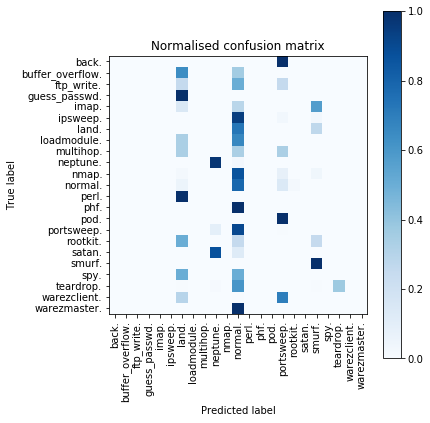

In [16]:
print("Confusion matrix:")
plot_normalised_confusion_matrix(confusion_matrix(y_train, y_train_pred),
labels_map)

In [17]:
print("Classification report:")
print(classification_report(y_train, y_train_pred,
target_names=labels_map))

Classification report:
                  precision    recall  f1-score   support

           back.       0.00      0.00      0.00      1120
buffer_overflow.       0.00      0.00      0.00        14
      ftp_write.       0.00      0.00      0.00         4
   guess_passwd.       0.00      0.00      0.00        26
           imap.       0.00      0.00      0.00         7
        ipsweep.       0.00      0.00      0.00       638
           land.       0.00      0.00      0.00        11
     loadmodule.       0.00      0.00      0.00         3
       multihop.       0.00      0.00      0.00         3
        neptune.       0.99      0.98      0.98     53606
           nmap.       0.00      0.00      0.00       111
         normal.       0.93      0.79      0.85     48703
           perl.       0.00      0.00      0.00         2
            phf.       0.00      0.00      0.00         1
            pod.       0.00      0.00      0.00       127
      portsweep.       0.00      0.00      0.00 

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [18]:
print("TEST SET")
print("Accuracy:", accuracy_score(y_test, y_test_pred))

TEST SET
Accuracy: 0.935763994316


Confusion matrix:


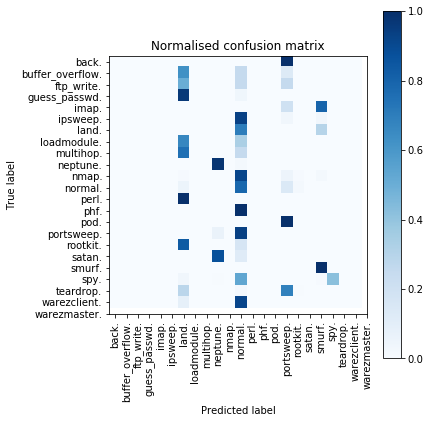

In [19]:
print("Confusion matrix:")
plot_normalised_confusion_matrix(confusion_matrix(y_test, y_test_pred),
labels_map)

In [20]:
print("Classification report:")
print(classification_report(y_test, y_test_pred, target_names=labels_map))

Classification report:
                  precision    recall  f1-score   support

           back.       0.00      0.00      0.00      1083
buffer_overflow.       0.00      0.00      0.00        16
      ftp_write.       0.00      0.00      0.00         4
   guess_passwd.       0.00      0.00      0.00        27
           imap.       0.00      0.00      0.00         5
        ipsweep.       0.00      0.00      0.00       609
           land.       0.00      0.00      0.00        10
     loadmodule.       0.00      0.00      0.00         6
       multihop.       0.00      0.00      0.00         4
        neptune.       0.99      0.98      0.98     53595
           nmap.       0.00      0.00      0.00       120
         normal.       0.93      0.79      0.85     48575
           perl.       0.00      0.00      0.00         1
            phf.       0.00      0.00      0.00         3
            pod.       0.00      0.00      0.00       137
      portsweep.       0.00      0.00      0.00 

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1428: UserWarning: labels size, 22, does not match size of target_names, 23
  .format(len(labels), len(target_names))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [21]:
import random
random.seed(101)

In [23]:
def sample_class_with_replacement(X, y, label, min_samples_out,max_samples_out):
    rows = np.where(y==label)[0]
    if len(rows) == 0:
        raise Exception
    n_estraction = min(max(len(rows), min_samples_out), max_samples_out)
    extracted = [random.choice(rows) for _ in range(n_estraction)]
    return extracted

In [42]:
train_idx = []
for label in np.unique(labels):
    try:
        idx = sample_class_with_replacement(X_train, y_train, label, 500,20000)
        train_idx.extend(idx)
    except:
        pass



In [48]:
X_train_sampled_balanced = X_train.ix[train_idx,:]


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  if __name__ == '__main__':


In [49]:
y_train_sampled_balanced = y_train[train_idx]

In [54]:
y_train_sampled_balanced.shape

(71062,)

In [55]:
X_train_sampled_balanced.shape

(71062, 141)

In [50]:
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import confusion_matrix

In [51]:
clf = SGDClassifier('log', random_state=101)
clf.fit(X_train_sampled_balanced, y_train_sampled_balanced)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [29]:
#Normalization and standardization

In [ ]:
#PCA or Feature selection

In [ ]:
#Split the data train and test

In [ ]:
#Fit the data to model

In [ ]:
#Results insights

In [ ]:
#Validate with test data